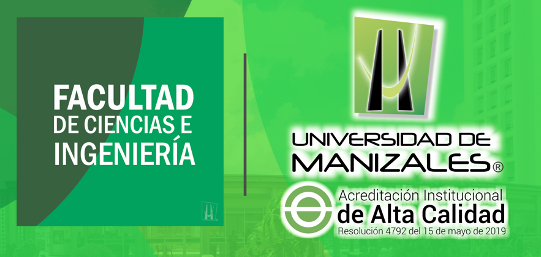

# **Modelos de Clasificación**

## **Algoritmos de Random Forest**

### **Descripción General de Random Forest**

Random Forest es un popular algoritmo de aprendizaje automático supervisado.

Los algoritmos de Random Forest son utilizados para modelos de  aprendizaje automático supervisado, donde hay una variable objetivo etiquetada.

Random Forest se pueden utilizar para resolver problemas de regresión (variable objetivo numérica) y clasificación (variable objetivo categórica). Este es un método de conjunto, lo que significa que combinan predicciones de otros modelos. Cada uno de los modelos más pequeños del conjunto de Random Forest es un árbol de decisión.

### **¿Cómo funcional la Clasificación de Random Forest?**

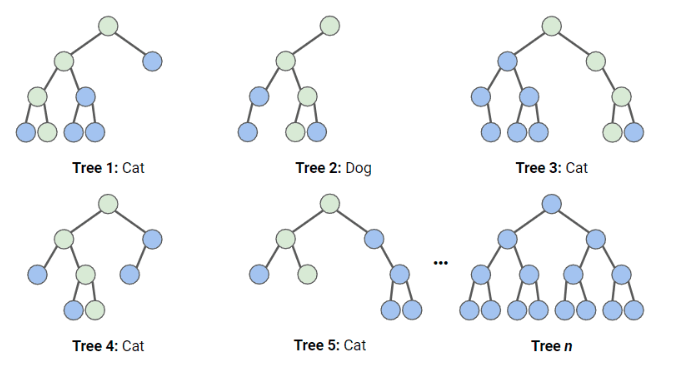

### **Conjunto de datos que vamos a trabajar: Bank_data**

Este conjunto de datos consiste en campañas de marketing directo de una institución bancaria portuguesa mediante llamadas telefónicas. Las campañas tenían como objetivo vender suscripciones a un depósito bancario a plazo. Vamos a almacenar este conjunto de datos en una variable llamada bank_data.

Las columnas (variables o características) que usaremos son:

* **age:** La edad de la persona que recibió la llamada telefónica
* **default:** Si la persona tiene crédito en mora
* **cons.price.idx:** Puntuación del índice de precios al consumidor en el momento de la llamada
* **cons.conf.idx:**  Puntuación del índice de confianza del consumidor en el momento de la llamada
* **y:** Si la persona se suscribió (esto es lo que estamos tratando de predecir)

### **Librerias necesarias para nuestro proyecto**

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt

### **Flujo de trabajo de Random forest**

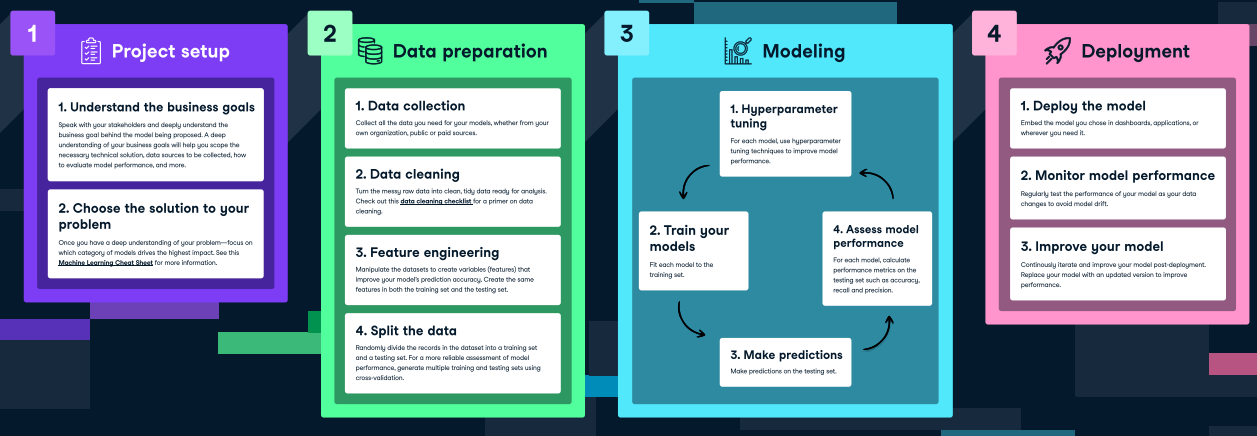

Haremos lo siguiente:

* Ingeniería de características
* dividir los datos
* entrenar al modelo
* Ajuste de hiperparámetros
* Evaluar el rendimiento del modelo

**Tarea:** Revisar el siguiente enlace:

https://www.datacamp.com/blog/a-beginner-s-guide-to-the-machine-learning-workflow

Cargamos el conjunto de datos, previamente obtenido de Kaggle

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Umanizales/Simulación/Random Forest/data_bank.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Seleccionar las variables necesarias para nuestro modelo

In [4]:
bank_data = df[['age', 'default', 'cons.price.idx', 'cons.conf.idx', 'y']].copy()

In [5]:
bank_data.head()

,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,93.994,-36.4,no
1,57,unknown,93.994,-36.4,no
2,37,no,93.994,-36.4,no
3,40,no,93.994,-36.4,no
4,56,no,93.994,-36.4,no


In [15]:
bank_data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [7]:
bank_data['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [8]:
bank_data.describe()

,age,cons.price.idx,cons.conf.idx
count,41188.00000,41188.000000,41188.000000
mean,40.02406,93.575664,-40.502600
std,10.42125,0.578840,4.628198
min,17.00000,92.201000,-50.800000
25%,32.00000,93.075000,-42.700000
50%,38.00000,93.749000,-41.800000
75%,47.00000,93.994000,-36.400000
max,98.00000,94.767000,-26.900000


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   default         41188 non-null  object 
 2   cons.price.idx  41188 non-null  float64
 3   cons.conf.idx   41188 non-null  float64
 4   y               41188 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB


# **Preprocesamiento de datos para Random Forest**

Los modelos basados ​​en árboles son mucho más resistentes a los valores atípicos que los modelos lineales, y no necesitan que las variables se normalicen para funcionar. Como tal, necesitamos hacer muy poco preprocesamiento de nuestros datos.

* Asignaremos nuestra columna 'predeterminada', que contiene **no** y **yes**, a 0s y 1s, respectivamente. Trataremos **unknown** los valores como **no** para este ejemplo.
* También asignaremos nuestro objetivo, y, a **1**s y **0**s.

In [9]:
bank_data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [17]:
bank_data.loc[:, 'default'] = bank_data['default'].map({'no':0, 'yes':1, 'unknown':0})

<ipython-input-17-34d3783458bb>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bank_data.loc[:, 'default'] = bank_data['default'].map({'no':0, 'yes':1, 'unknown':0})


In [18]:
bank_data

,age,default,cons.price.idx,cons.conf.idx,y
0,56,0,93.994,-36.4,no
1,57,0,93.994,-36.4,no
2,37,0,93.994,-36.4,no
3,40,0,93.994,-36.4,no
4,56,0,93.994,-36.4,no
...,...,...,...,...,...
41183,73,0,94.767,-50.8,yes
41184,46,0,94.767,-50.8,no
41185,56,0,94.767,-50.8,no
41186,44,0,94.767,-50.8,yes


In [21]:
bank_data.loc[:, 'y'] = bank_data['y'].map({'no':0, 'yes':1})

<ipython-input-21-d216fafa7c6b>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bank_data.loc[:, 'y'] = bank_data['y'].map({'no':0, 'yes':1})


In [24]:
bank_data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [30]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   default         41188 non-null  int64  
 2   cons.price.idx  41188 non-null  float64
 3   cons.conf.idx   41188 non-null  float64
 4   y               41188 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.6 MB


Inicialmente generamos las características (Variable X) y la variable de respuesta (y)

In [31]:
# prompt: bank_data.describe(include=) para variables categoricas

df.describe(include='object')


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [32]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']

In [35]:
X

,age,default,cons.price.idx,cons.conf.idx
0,56,0,93.994,-36.4
1,57,0,93.994,-36.4
2,37,0,93.994,-36.4
3,40,0,93.994,-36.4
4,56,0,93.994,-36.4
...,...,...,...,...
41183,73,0,94.767,-50.8
41184,46,0,94.767,-50.8
41185,56,0,94.767,-50.8
41186,44,0,94.767,-50.8


## **Construcción de conjuntos de datos de entrenamiento y de validación**

Al entrenar cualquier modelo de aprendizaje supervisado, es importante dividir los datos en datos de entrenamiento (train) y de prueba (test). Los datos de entrenamiento se utilizan para ajustar el modelo. El algoritmo usa los datos de entrenamiento para aprender la relación entre las **características** y la variable **objetivo**. Los datos de prueba se utilizan para **evaluar** el rendimiento del modelo.

El siguiente código divide los datos en variables separadas para las características y el objetivo, luego se divide en datos de entrenamiento y prueba.

In [36]:
41188*0.8

32950.4

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train

,age,default,cons.price.idx,cons.conf.idx
12556,40,0,93.918,-42.7
35451,31,0,92.893,-46.2
30592,59,0,92.893,-46.2
17914,43,0,93.918,-42.7
3315,39,0,93.994,-36.4
...,...,...,...,...
6265,58,0,93.994,-36.4
11284,37,0,94.465,-41.8
38158,35,0,92.431,-26.9
860,40,0,93.994,-36.4


In [ ]:
y_train

12556    0
35451    0
30592    0
17914    0
3315     0
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: y, Length: 32950, dtype: int64

In [38]:
y_train.value_counts()

0    29245
1     3705
Name: y, dtype: int64

# **Ajuste y evaluación del modelo**

Primero creamos una instancia del modelo **Random Forest**, con los parámetros predeterminados. Luego ajustamos esto a nuestros datos de entrenamiento. Pasamos tanto las características como la variable de destino, para que el modelo pueda aprender.

In [39]:
rf = RandomForestClassifier()

In [40]:
rf

RandomForestClassifier()

Ajustamos el clasificador a los datos de entremaniento (train)

In [41]:
rf.fit(X_train, y_train)

RandomForestClassifier()

En este punto, tenemos un modelo Random Forest entrenado, pero necesitamos averiguar si está haciendo predicciones precisas

In [42]:
y_pred = rf.predict(X_test)

In [46]:
# prompt: valores unicos de y_pred para un arreglo

import numpy as np
np.unique(y_pred)


array([0, 1])

In [47]:
pred= pd.crosstab(y_test, y_pred)
pred

col_0,0,1
y,,
0,7095,208
1,749,186


In [48]:
(7095+186)/(7095+208+749+186)

0.8838310269482884

In [54]:
186/(186+208)

0.4720812182741117

In [ ]:
y_test.value_counts()

0    7263
1     975
Name: y, dtype: int64

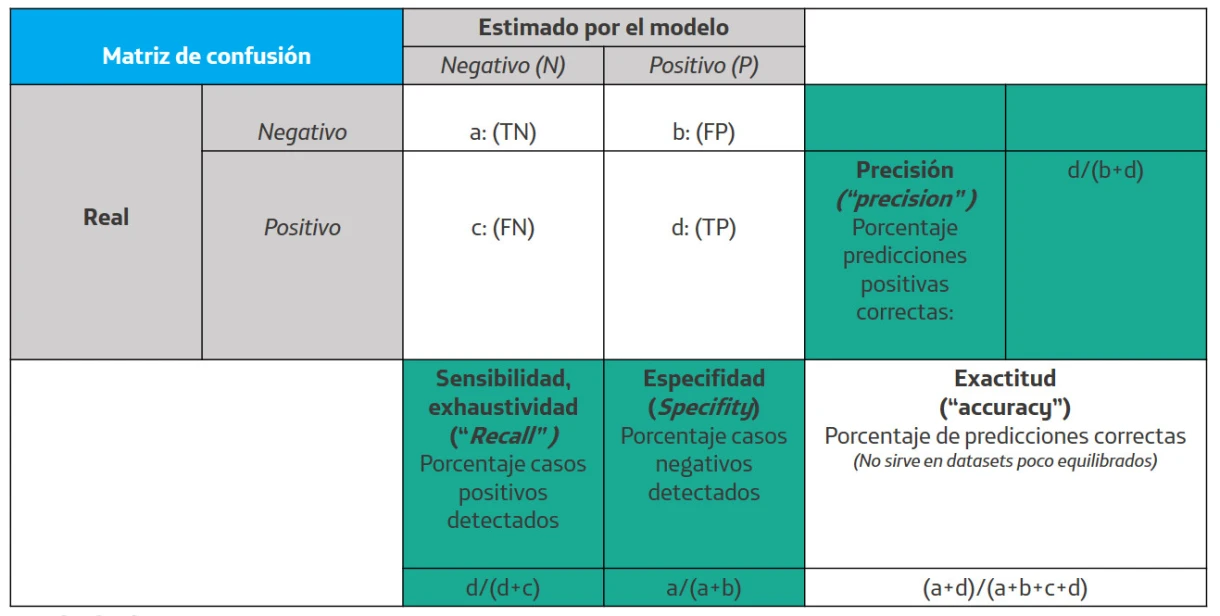

La forma más sencilla de evaluar este modelo es utilizando la precisión; comparamos las predicciones con los valores reales en el conjunto de prueba y contamos cuántos acertó el modelo

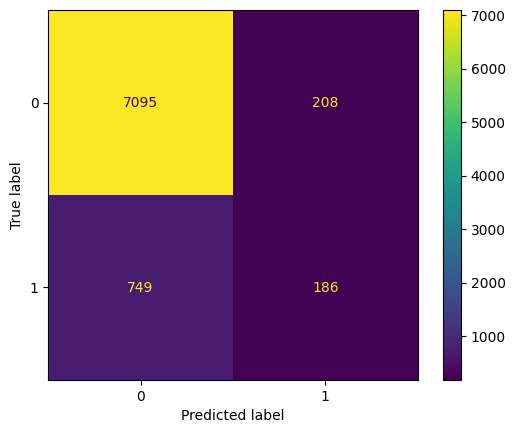

In [51]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8838310269482884


In [53]:
print('precision', precision_score(y_test, y_pred))

precision 0.4720812182741117


# **Visualización de los resultados**

Podemos usar el siguiente código para visualizar nuestros primeros 3 árboles.

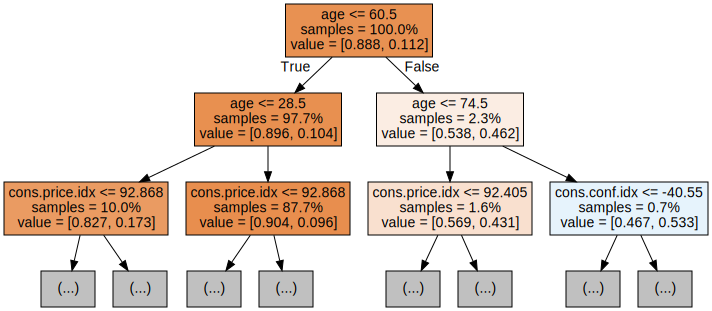

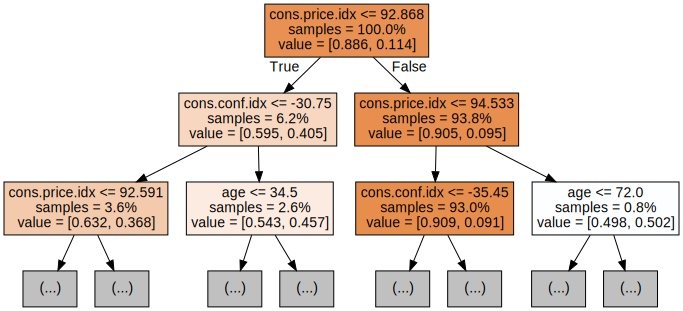

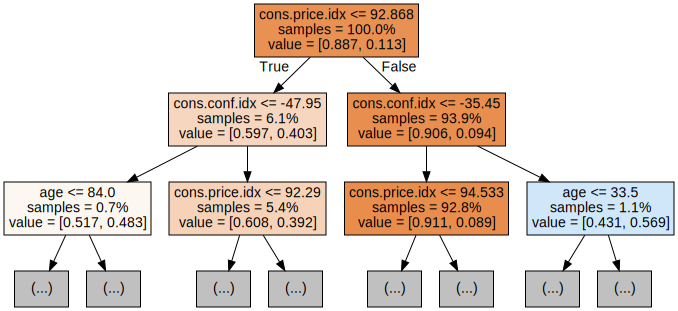

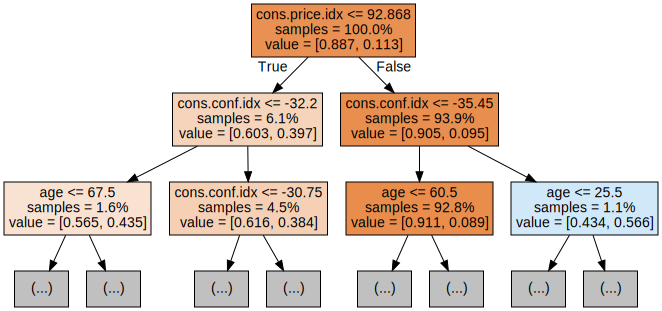

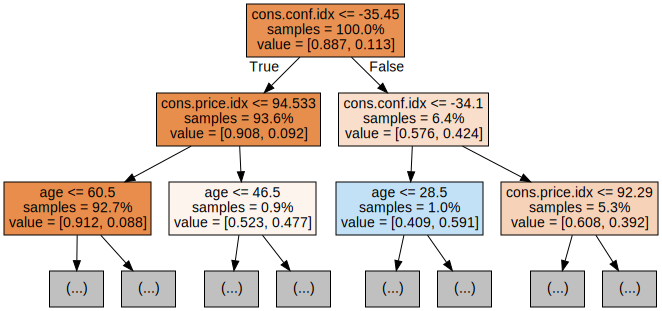

In [56]:
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Cada imagen de árbol se limita a mostrar solo los primeros nodos. Estos árboles pueden llegar a ser muy grandes y difíciles de visualizar. Los colores representan la clase mayoritaria de cada nodo (cuadro, con rojo que indica mayoría 0 (sin suscripción) y azul que indica mayoría 1 (suscripción). Los colores se vuelven más oscuros cuanto más se acerca el nodo a ser completamente 0 o 1. Cada nodo también contiene la siguiente información:

1. El nombre de la variable y el valor utilizado para dividir
2. El % del total de muestras en cada división
3. El % de división entre clases en cada división

# **Ajuste de Hiperparámetros**

El siguiente código usa Scikit-Learn's RandomizedSearchCV, que buscará aleatoriamente parámetros dentro de un rango por hiperparámetro. Definimos los hiperparámetros a utilizar y sus rangos en el diccionario param_dist. En nuestro caso, estamos usando:

* **n_estimators :** el número de árboles de decisión en el bosque. El aumento de este hiperparámetro generalmente mejora el rendimiento del modelo, pero también aumenta el costo computacional de entrenamiento y predicción.
* **max_ depth :** la profundidad máxima de cada árbol de decisión en el bosque. Establecer un valor más alto para max_ depth puede dar lugar a un ajuste excesivo, mientras que establecerlo demasiado bajo puede dar lugar a un ajuste insuficiente.

In [57]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data


In [58]:
rand_search

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7946a04b6f80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7946a03c7dc0>})

In [59]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7946a04b6f80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7946a03c7dc0>})

In [60]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 464}


# **Más métricas de evaluación**

Veamos la matriz de confusión. Esto traza lo que predijo el modelo frente a cuál fue la predicción correcta. Podemos usar esto para comprender la compensación entre falsos positivos (arriba a la derecha) y falsos negativos (abajo a la izquierda). Podemos trazar la matriz de confusión usando este código:

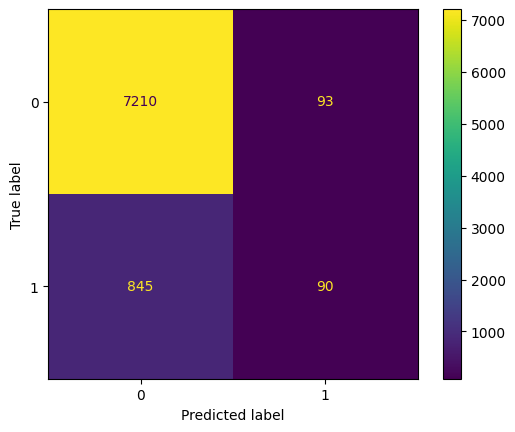

In [61]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

También debemos evaluar el mejor modelo con exactitud, precisión y recuperación (tenga en cuenta que sus resultados pueden diferir debido a la aleatorización)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.8861374119932023
Precision: 0.4918032786885246


El siguiente código traza la importancia de cada característica, utilizando la puntuación interna del modelo para encontrar la mejor manera de dividir los datos dentro de cada árbol de decisión.

In [63]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances

cons.conf.idx     0.554384
cons.price.idx    0.238364
age               0.207250
default           0.000003
dtype: float64

In [65]:
df['age'].max()

98

# **Gráfica de la importancia de las características**

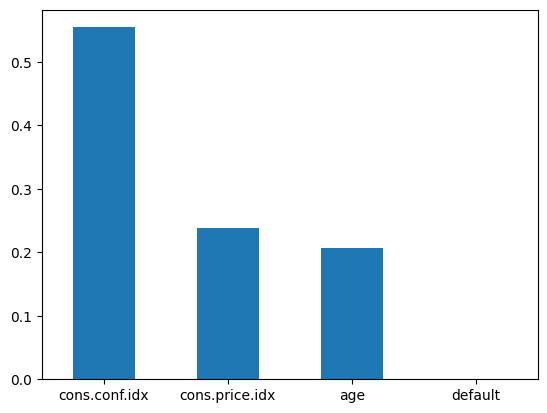

In [66]:
# Plot a simple bar chart
feature_importances.plot.bar();
plt.xticks(rotation=0)
plt.show()

Esto nos dice que el índice de confianza del consumidor, en el momento de la llamada, fue el mayor predictor de si la persona se suscribió.

# Generamos el modelo basado en árboles de decisión